1. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Обучите случайный лес, задав только гиперпараметры `n_estimators=100` и `random_state=0`. Оцените важность признаков. Укажите название двух наиболее важных признаков. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
df = pd.DataFrame(data.data,
                   columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
df['target']=data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [9]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [10]:
train_df=df[(df.target==0 ) | (df.target==1)]
train_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [11]:
train_df.target.value_counts()

1    71
0    59
Name: target, dtype: int64

In [12]:
X_train=train_df.iloc[:,:-1]
y_train=train_df.target
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [13]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
#mean_squared_error(y_test, clf.predict(X_test))

Wall time: 1.34 s


RandomForestRegressor(random_state=0)

<AxesSubplot:xlabel='importances', ylabel='name'>

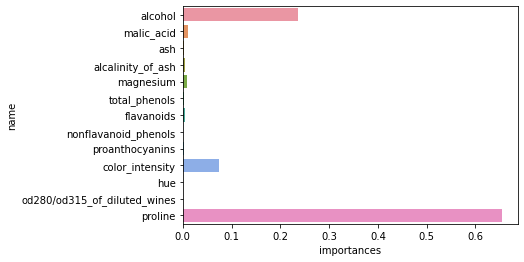

In [14]:
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':data.feature_names})
sns.barplot(x="importances", y="name", data=feature_imp)

<AxesSubplot:xlabel='importances', ylabel='name'>

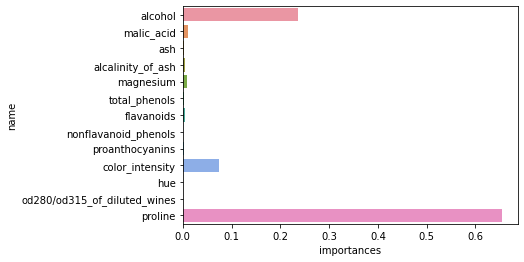

In [15]:
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'name':X_train.columns})
sns.barplot(x="importances", y="name", data=feature_imp)

In [16]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

2. Загрузите данные load_wine из sklearn.datasets. Из обучающей части исключите объекты класса 2. Отмасштабируйте признаки, используя класс StandardScaler с гиперпараметрами по умолчанию. Обучите случайный лес, задав только гиперпараметры  `n_estimators = 100` и `random_state=0`. Оцените важность признаков. Укажите название двух наиболее важных признаков.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(train_df))
StandardScaler()
print(scaler.mean_)
train_df_scaled=scaler.transform(train_df)
#print(scaler.transform([[2, 2]]))

StandardScaler()
[1.29440769e+01 1.96807692e+00 2.34046154e+00 1.87853846e+01
 9.99000000e+01 2.52269231e+00 2.49000000e+00 3.30230769e-01
 1.75238462e+00 4.19476923e+00 1.05889231e+00 2.95438462e+00
 7.90092308e+02 5.46153846e-01]


In [18]:
train_df_scaled

array([[ 1.452455  , -0.29441432,  0.30247764, ...,  2.04002469,
         0.782868  , -1.09699126],
       [ 0.28906609, -0.21455828, -0.67719651, ...,  0.94143735,
         0.74015178, -1.09699126],
       [ 0.24388594,  0.4471061 ,  1.11324246, ...,  0.45552372,
         1.12459784, -1.09699126],
       ...,
       [-1.30353427,  0.18472195,  1.484843  , ..., -1.0867239 ,
        -0.92293343,  0.91158429],
       [-0.64842207, -0.38567837, -0.13668663, ..., -0.36841679,
        -1.27605426,  0.91158429],
       [-1.02115832,  2.66025935,  0.13356831, ..., -0.81207706,
        -0.59829008,  0.91158429]])

In [19]:
y_train_scaled=y_train=train_df_scaled[:,-1]
X_train_scaled=train_df_scaled[:,:-1]
y_train_scaled

array([-1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126, -1.09699126,
       -1.09699126, -1.09699126, -1.09699126, -1.09699126,  0.91158429,
        0.91158429,  0.91158429,  0.91158429,  0.91158429,  0.91158429,
        0.91158429,  0.91158429,  0.91158429,  0.91158429,  0.91

In [20]:
X_train_scaled

array([[ 1.452455  , -0.29441432,  0.30247764, ..., -0.11242761,
         2.04002469,  0.782868  ],
       [ 0.28906609, -0.21455828, -0.67719651, ..., -0.05291788,
         0.94143735,  0.74015178],
       [ 0.24388594,  0.4471061 ,  1.11324246, ..., -0.17193734,
         0.45552372,  1.12459784],
       ...,
       [-1.30353427,  0.18472195,  1.484843  , ..., -0.52899571,
        -1.0867239 , -0.92293343],
       [-0.64842207, -0.38567837, -0.13668663, ..., -1.00507355,
        -0.36841679, -1.27605426],
       [-1.02115832,  2.66025935,  0.13356831, ..., -1.60017084,
        -0.81207706, -0.59829008]])

In [21]:
clf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
clf_scaled.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(random_state=0)

<AxesSubplot:xlabel='importances', ylabel='name'>

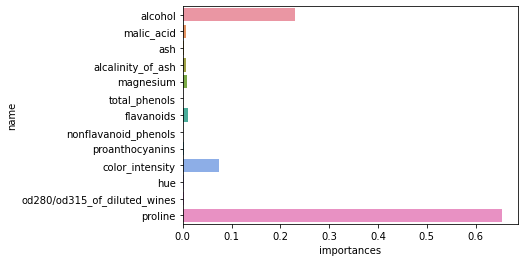

In [22]:
feature_imp = pd.DataFrame({'importances': clf_scaled.feature_importances_, 'name':data.feature_names})
sns.barplot(x="importances", y="name", data=feature_imp)

Ниже приведена неполная реализация класса Bagging который имеет методы `fit` для обучения бэггинга над `DecisionTreeRegressor` и метод `predict` для предсказания. Допишите необходимый код, чтобы реализовать бэггинг.

используемы переменные в коде:
- `self.n_estimators`, `n_estimators` - число используемых деревьев
- `self.regressors` - список объектов класса `DecisionTreeRegressor`, к которым уже был применён метод `fit`
Данный список необъодимо заполнить в методе `fit` и использовать для предсказания в методе `predict`
- `ind`-  выбранные индексы объектов при бутстрапе

при создании объекта класса `DecisionTreeRegressor` зафиксируйте  
`random_state=0`

In [24]:
'''import numpy as np
from sklearn.tree import DecisionTreeRegressor
class Bagging():
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.regressors = []
    def fit(self, x_train, y_train):
        for i in range(self.n_estimators):
            np.random.seed(i)
            ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])
       # your code here
    def predict(self, x_test):
    # your code here'''

'import numpy as np\nfrom sklearn.tree import DecisionTreeRegressor\nclass Bagging():\n    def __init__(self, n_estimators=10):\n        self.n_estimators = n_estimators\n        self.regressors = []\n    def fit(self, x_train, y_train):\n        for i in range(self.n_estimators):\n            np.random.seed(i)\n            ind = np.random.choice(np.arange(x_train.shape[0]), size = x_train.shape[0])\n       # your code here\n    def predict(self, x_test):\n    # your code here'

Загрузите данные приложенные к заданию

In [25]:
import pandas as pd
#from google.colab import files
Data=pd.read_csv('HSE Week 8 data .csv', header=None)
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.510632,-1.313935,-0.114209,-0.143679,2.107414,1.507354,-0.315861,-1.030258,0.644616,0.531194,...,-0.892854,-0.699436,0.442937,1.134091,-0.355533,-1.355772,0.363396,1.294192,0.750299,-37.192781
1,0.538866,0.387687,-1.137239,-1.092431,0.038607,1.142312,-0.321904,-0.237227,-1.451496,-0.385336,...,-0.056560,1.248607,-0.346863,-0.973055,1.042978,-0.404316,0.028007,-2.658630,-2.001785,-220.464123
2,-0.068804,0.776603,-1.611731,-1.239927,0.712057,2.075371,-1.462034,1.151911,1.269848,0.725593,...,1.989607,-0.021897,-0.372160,-0.870986,1.192751,-0.062865,0.209232,-0.350511,0.409299,-325.380249
3,-0.884799,-0.620779,0.841720,-1.129511,-0.966720,-1.577867,0.058787,0.223962,-1.005101,0.113334,...,0.214109,-1.083825,-0.476753,-0.904678,-0.637636,-0.741085,-0.126770,-1.063897,-0.003012,-126.861161
4,-0.701277,0.614840,0.434146,-0.126249,-0.591696,0.500336,1.018807,0.848046,-0.817596,-0.060330,...,-0.257656,-1.565868,0.049286,0.239042,-1.047043,0.191627,0.071640,0.766967,1.570351,92.835567


Положим матрицу объекты-признаки в переменную `X`, а ответы в переменную `y`

In [26]:
X, y = Data.iloc[:, :100], Data.iloc[:, 100]


Положим первые 6000 объектов в обучающую часть, остальные объекты в тестовую часть

In [27]:
X_train, y_train = X[:6000], y[:6000]
X_test, y_test = X[6000:], y[6000:]

In [28]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

In [29]:
y_test

,100
6000,-125.823391
6001,299.447911
6002,-251.967791
6003,348.008031
6004,564.190065
...,...
9995,-81.970815
9996,333.913195
9997,-181.235558
9998,-128.034855


3. Обучите бэггинг на 1 дереве. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [30]:
#from sklearn.svm import SVC
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(n_estimators=1 , base_estimator=None  #,SVC(),
                        , random_state=0).fit(X_train, y_train)
y_pred=regr.predict(X_test)
#array([1])
mean_squared_error(y_test, y_pred)/1000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


35.340160059117764

4. Обучите бэггинг на 5 деревьях. Оцените качество по метрике MSE на тестовой части. Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [31]:
regr = BaggingRegressor(n_estimators=5 , base_estimator=None  #,SVC(),
                        , random_state=0).fit(X_train, y_train)
y_pred=regr.predict(X_test)
#array([1])
mean_squared_error(y_test, y_pred)/1000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


15.462419035454408

5. Обучите бэггинг на 100 деревьях. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [32]:
regr = BaggingRegressor(n_estimators=100 , base_estimator=None  #,SVC(),
                        , random_state=0).fit(X_train, y_train)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)/1000

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


10.868598096819383

6. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [33]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 1, random_state=0)
regr.fit(X, y)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)/1000

11.683919814756013

7. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 1`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [34]:
regr = RandomForestRegressor(n_estimators = 1, random_state=0)
regr.fit(X, y)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)/1000

11.683919814756013

8. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 5`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [35]:
%%time
regr = RandomForestRegressor(n_estimators = 5, random_state=0)
regr.fit(X, y)
y_pred=regr.predict(X_test)
mean_squared_error(y_test, y_pred)/1000

Wall time: 2.51 s


3.4717544846780544

9. Обучите на этих же данных случайный лес, используйте гиперпараметр `n_estimators = 100`, зафиксируйте  
`random_state=0`. Оцените качество по метрике MSE на тестовой части. . Ответ разделите на 1000 и округлите до целой части по математичестким правилам округления.

In [36]:
%%time
regr = RandomForestRegressor(n_estimators =10, random_state=0)
regr.fit(X, y)
y_pred=regr.predict(X_test)
round((mean_squared_error(y_test, y_pred)/1000),1)

Wall time: 5 s


2.4

10. Изучите документацию и разберитесь как посчитать Out-of-bag ошибку в RandomForestRegressor. Обучите RandomForestRegressor с гиперпараметром n_estimators=100 на обучающей части, зафиксируйте  
`random_state=0`. Найдите Out-of-bag ошибку алгоритма. Ответ округлите до сотых.

In [37]:
%%time
regr = RandomForestRegressor(n_estimators =100, random_state=0, oob_score =True)
regr.fit(X, y)
y_pred=regr.predict(X_test)
round(mean_squared_error(y_test, y_pred)/1000)

regr.oob_score_

Wall time: 50.5 s


0.7821905747463324